# Supplement notebook 1
## ExperimentalData class demonstration

This purpose of this notebook is to introduce and demonstrate the ExperimentalData. 

First we import python packages that we need. Please refer to tutorials on Scipy, NumPy, Matplotlib, and Seaborn if unfamilar with these powerful tools.

In [1]:
from IPython.display import display
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr

In [2]:
import magine.data.tools as dt
from magine.plotting.wordcloud_tools import create_wordcloud
from magine.plotting.venn_diagram_maker import create_venn2, create_venn3

## ExperimentalData class structure

Since MAGINE is built for multi-sample, multi-omics data, it is no surprise that the data is the most important aspect. Here we should how to use the :py:class:`ExperimentalData` class. 

In [3]:
# load the experimental data
from magine.data.experimental_data import load_data

In [4]:
help(load_data)

Help on function load_data in module magine.data.experimental_data:

load_data(file_name, **kwargs)
    Load data into EnrichmentResult data class
    
    Parameters
    ----------
    file_name : str
    kwargs :
        Flags to pass to pandas.
    
    Returns
    -------
    df : EnrichmentResult



In [5]:
exp_data = load_data(
    'Data/bendamustine.csv.gz', # filename and location
    # Following args are passed to pandas.read_csv
    low_memory=False, 
    index_col=0    
)

### Getting counts from data
First, lets quickly view the stats about the data. 

In [6]:
display(exp_data.create_summary_table())
display(exp_data.create_summary_table(index='label'))

sample_id,000030_s,00030_min,001_hr,003_hr,006_hr,012_hr,018_hr,024_hr,036_hr,048_hr,060_hr,072_hr,Total Unique Across
source,,,,,,,,,,,,,
C18,5735,5114,5721,5834,6313,6574,6201,4531,7825,6267,4751,4773,19570
HILIC,11891,9412,11880,7882,14215,14702,12666,10451,11902,13013,10804,6350,27959
label_free,3215,3451,3113,4098,2907,3150,4273,4374,4100,4448,4188,2628,5611
ph_silac,3240,-,3495,-,3327,3756,-,3212,-,-,-,-,4877
rna_seq,-,-,16550,-,15887,16017,-,16418,-,-,-,-,17679
silac,1629,-,1883,-,1761,1650,-,1664,-,-,-,-,2323


sample_id,000030_s,00030_min,001_hr,003_hr,006_hr,012_hr,018_hr,024_hr,036_hr,048_hr,060_hr,072_hr,Total Unique Across
source,,,,,,,,,,,,,
C18,5629,5014,5626,5729,6188,6454,6074,4458,7707,6155,4670,4687,19212
HILIC,11754,9314,11758,7781,14038,14530,12493,10322,11746,12869,10684,6271,27572
label_free,3730,4113,3553,4717,3329,3645,4953,5058,4651,5263,4767,2911,7428
ph_silac,12224,-,14512,-,12709,15472,-,12252,-,-,-,-,25613
rna_seq,-,-,16550,-,15887,16017,-,16418,-,-,-,-,17679
silac,1629,-,1883,-,1761,1650,-,1664,-,-,-,-,2323


From here, we can see that we have 12 time points and 6 experimental platforms for the data. This is of all the data. We can filter by significantly measured or by looking at `label` column (default is `identifier`

In [7]:
display(exp_data.create_summary_table(sig=True))
display(exp_data.create_summary_table(sig=True, index='label'))

sample_id,000030_s,00030_min,001_hr,003_hr,006_hr,012_hr,018_hr,024_hr,036_hr,048_hr,060_hr,072_hr,Total Unique Across
source,,,,,,,,,,,,,
C18,870,121,454,555,444,322,293,341,1032,684,787,1224,5414
HILIC,729,452,226,891,354,1053,732,410,83,2118,116,137,6244
label_free,14,18,22,37,113,18,85,161,39,162,853,542,1483
ph_silac,609,-,883,-,1091,722,-,944,-,-,-,-,2437
rna_seq,-,-,51,-,51,69,-,611,-,-,-,-,736
silac,20,-,30,-,19,20,-,58,-,-,-,-,133


sample_id,000030_s,00030_min,001_hr,003_hr,006_hr,012_hr,018_hr,024_hr,036_hr,048_hr,060_hr,072_hr,Total Unique Across
source,,,,,,,,,,,,,
C18,840,119,443,542,435,314,289,335,1014,670,776,1198,5296
HILIC,699,437,215,866,353,1044,713,394,83,2094,115,134,6138
label_free,14,18,22,37,114,18,86,168,39,170,925,591,1653
ph_silac,755,-,1189,-,1525,975,-,1570,-,-,-,-,5115
rna_seq,-,-,51,-,51,69,-,611,-,-,-,-,736
silac,20,-,30,-,19,20,-,58,-,-,-,-,133


The `.species` index aggregates all data. Since we utilize a `pandas.DataFrame`, we can use the `.head` method to glance at the data.

In [8]:
exp_data.species.head(5)

,identifier,label,fold_change,significant,p_value,species_type,sample_id,source
0,UBA6,UBA6_silac,-1.049913,False,1.0,protein,001_hr,silac
1,MTDH,MTDH_silac,-1.038867,False,1.0,protein,001_hr,silac
2,SLC25A24,SLC25A24_silac,1.014615,False,1.0,protein,001_hr,silac
3,ANKRD22,ANKRD22_silac,-1.058937,False,1.0,protein,001_hr,silac
4,AGK,AGK_silac,1.001600,False,1.0,protein,001_hr,silac


We can filter the data by `source` using the `.name`, where name is anything in the `source` column. We can get a list of these by printing `exp_data.exp_methods`

In [9]:
exp_data.exp_methods

['silac', 'ph_silac', 'HILIC', 'C18', 'label_free', 'rna_seq']

In [10]:
# filters to only the 'label_free' 
exp_data.label_free.shape

(50736, 8)

In [11]:
exp_data.label_free.head(5)

,identifier,label,fold_change,significant,p_value,species_type,sample_id,source
515804,RHOXF2B,RHOXF2B_lf,1.51,True,0.0003,protein,036_hr,label_free
515805,KIF11,KIF11_lf,1.70,True,0.0008,protein,036_hr,label_free
515806,MYBBP1A,MYBBP1A_S(ph)1163_lf,1.40,False,0.0009,protein,036_hr,label_free
515807,CDC20,CDC20_lf,2.78,True,0.0012,protein,036_hr,label_free
515808,TMPO,TMPO_T(ph)160_lf,-1.47,False,0.0016,protein,036_hr,label_free


In [12]:
exp_data.rna_seq.head(5)

,identifier,label,fold_change,significant,p_value,species_type,sample_id,source
566540,CDC20,CDC20_rnaseq,-1.528232,True,0.016321,rna_seq,012_hr,rna_seq
566541,ASPM,ASPM_rnaseq,-1.346689,False,0.038802,rna_seq,012_hr,rna_seq
566542,FO538757.2,FO538757.2_rnaseq,2.133888,True,0.038802,rna_seq,012_hr,rna_seq
566543,GNL3,GNL3_rnaseq,-2.313025,True,0.016321,rna_seq,012_hr,rna_seq
566544,SNORD19,SNORD19_rnaseq,-2.313025,True,0.016321,rna_seq,012_hr,rna_seq


### Significant filter 
We can use the `significant` column to filter that data to only contain those species.

In [13]:
exp_data.species.shape

(558025, 8)

In [14]:
exp_data.species.sig.shape

(24620, 8)

### Filter data to up or down regulated species.

For enrichment analysis, we will want to access up-regulated and down-regulated species using `.up` and `.down`.

In [15]:
exp_data.rna_seq.up.head(5)

,identifier,label,fold_change,significant,p_value,species_type,sample_id,source
566542,FO538757.2,FO538757.2_rnaseq,2.133888,True,0.038802,rna_seq,012_hr,rna_seq
566546,RP4-669L17.10,RP4-669L17.10_rnaseq,3.788399,True,0.029804,rna_seq,012_hr,rna_seq
566547,RP4-669L17.4,RP4-669L17.4_rnaseq,3.788399,True,0.029804,rna_seq,012_hr,rna_seq
566548,RNU6-513P,RNU6-513P_rnaseq,2.462533,True,0.016321,rna_seq,012_hr,rna_seq
566549,RRP7B,RRP7B_rnaseq,2.462533,True,0.016321,rna_seq,012_hr,rna_seq


In [16]:
exp_data.rna_seq.down.head(5)

,identifier,label,fold_change,significant,p_value,species_type,sample_id,source
566540,CDC20,CDC20_rnaseq,-1.528232,True,0.016321,rna_seq,012_hr,rna_seq
566543,GNL3,GNL3_rnaseq,-2.313025,True,0.016321,rna_seq,012_hr,rna_seq
566544,SNORD19,SNORD19_rnaseq,-2.313025,True,0.016321,rna_seq,012_hr,rna_seq
566545,SNORD19B,SNORD19B_rnaseq,-2.313025,True,0.016321,rna_seq,012_hr,rna_seq
566550,FAM73A,FAM73A_rnaseq,-9.644115,True,0.016321,rna_seq,012_hr,rna_seq


### Extracting by sample (time point)

We can filter by `sample_id`.


In [17]:
exp_data.sample_ids

['000030_s',
 '00030_min',
 '001_hr',
 '003_hr',
 '006_hr',
 '012_hr',
 '018_hr',
 '024_hr',
 '036_hr',
 '048_hr',
 '060_hr',
 '072_hr']

In [18]:
exp_data['000030_s'].head(5)

,identifier,label,fold_change,significant,p_value,species_type,sample_id,source
5200,UBA6,UBA6_silac,-1.088427,False,1.0,protein,000030_s,silac
5201,AKR1A1,AKR1A1_silac,1.065195,False,1.0,protein,000030_s,silac
5202,MTHFD2,MTHFD2_silac,-1.308449,False,1.0,protein,000030_s,silac
5203,DLAT,DLAT_silac,1.029963,False,1.0,protein,000030_s,silac
5204,CNP,CNP_silac,-1.244300,False,1.0,protein,000030_s,silac


### Calculating overlaps between time points

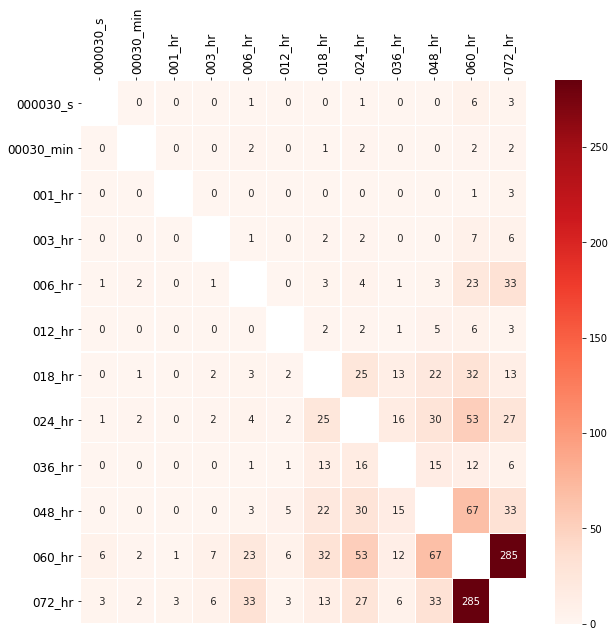

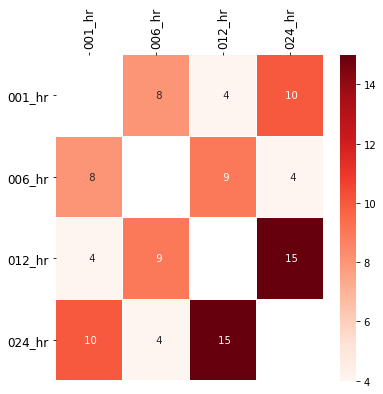

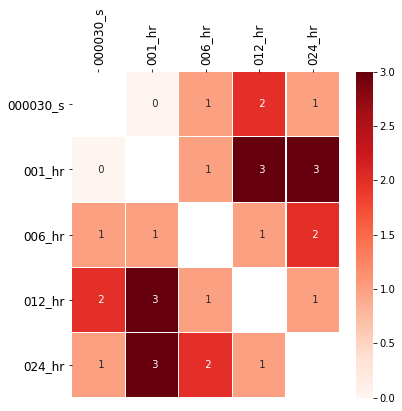

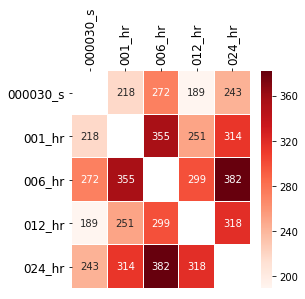

In [19]:
from itertools import combinations

def overlap(vals):
    return len(vals[0].intersection(vals[1]))

def calc_dist(names, gene_sets, figsize=(12, 12)):
   
    n_dim = len(names)
    scores = list(map(overlap, combinations(gene_sets, 2)))
    
    dist_mat = np.zeros((n_dim, n_dim), dtype=float)
    ind = 0
    for i in range(n_dim):
        for j in range(i, n_dim):
            if i == j:
                dist_mat[i, i] = np.nan
                continue
            elif i>= j:
                continue
            dist_mat[i, j] = scores[ind]
            dist_mat[j, i] = scores[ind]
            ind += 1

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    cmap=plt.cm.Reds
    cmap.set_under(".5")
    fig = sns.heatmap(dist_mat, cmap=cmap, fmt='3g', annot=True, linewidths=0.1, 
                xticklabels=names, yticklabels=names, ax=ax, square=False)
    ax.xaxis.tick_top()
    ax.set_xticklabels(names, minor=False, rotation=90, fontsize=12)
    ax.set_yticklabels(names, minor=False, rotation=0, fontsize=12)
       

def overlap_by_source(source_name, figsize=(10, 10)):
    sample_ids = np.array(exp_data[source_name].sample_ids)
    sample_sets = exp_data[source_name].sig.by_sample
    calc_dist(sample_ids, sample_sets, figsize)
    
overlap_by_source('label_free')
overlap_by_source('rna_seq', figsize=(6, 6))
overlap_by_source('silac', figsize=(6, 6))
overlap_by_source('ph_silac', figsize=(4, 4))
plt.savefig("ph_silac_overlap_by_time.png", dpi=300, bbox_inches='tight')

We can apply the same function to compare across experimental platforms.

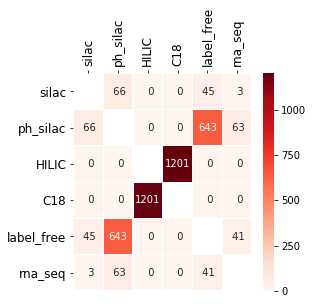

In [20]:
names, sets = [], []
for i in exp_data.exp_methods:
    sets.append(exp_data[i].sig.id_list)
    names.append(i)
calc_dist(names, sets, figsize=(4, 4))
plt.savefig("overlap_experiments.png", dpi=300, bbox_inches='tight')

### Pivot table to get table across time

In [21]:
exp_data.rna_seq.pivoter(
    convert_to_log=False, 
    index='identifier',
    columns='sample_id',
    values=['fold_change', 'p_value']
).head(5)

fold_change                                 p_value           \
sample_id       001_hr    006_hr    012_hr    024_hr    001_hr   006_hr   
identifier                                                                
7SK           1.139800 -1.148785 -1.014452  1.037751  0.999631  0.99995   
A1BG         -2.402129  1.288824  1.610149  1.168061  0.999631  0.99995   
A1BG-AS1     -1.081850  1.257409  1.056497 -1.099355  0.999631  0.99995   
A2ML1        -1.372659  1.307877 -1.343714  1.793100  0.999631  0.99995   
AAAS          1.203116 -1.058658 -1.012985  1.007011  0.999631  0.99995   

                                
sample_id     012_hr    024_hr  
identifier                      
7SK         0.999660  0.864095  
A1BG        0.803284  0.673174  
A1BG-AS1    0.999660  0.752914  
A2ML1       0.999660  0.274612  
AAAS        0.999660  0.970896

In [22]:
exp_data.ph_silac.pivoter(
    convert_to_log=False, 
    index='label',
    columns='sample_id',
    values=['fold_change', 'p_value']
).head(5)

fold_change                                           \
sample_id                000030_s    001_hr    006_hr     012_hr    024_hr   
label                                                                        
A2M_1004_1014_phsilac         NaN -1.060800       NaN  43.747479       NaN   
A2M_339_345_phsilac           NaN       NaN       NaN  -1.157100       NaN   
AAAS_S(ph)495_phsilac    1.121971 -1.230439 -1.159737  -1.288961 -1.486965   
AAGAB_134_161_phsilac    1.134301       NaN       NaN        NaN       NaN   
AAGAB_274_284_phsilac         NaN       NaN       NaN  -1.123760       NaN   

                       p_value                              
sample_id             000030_s 001_hr 006_hr 012_hr 024_hr  
label                                                       
A2M_1004_1014_phsilac      NaN    1.0    NaN  0.049    NaN  
A2M_339_345_phsilac        NaN    NaN    NaN  1.000    NaN  
AAAS_S(ph)495_phsilac      1.0    1.0    1.0  1.000    1.0  
AAGAB_134_161_phsilac      1.0    NaN    NaN    NaN    NaN  
AAGAB_274_284_phsilac      NaN    NaN    NaN  1.000    NaN

Note that in the previous example, we find that there are NaN values. This is because there might be measurements missing in our experimental data. We can easy check what species are not found in all samples.

In [23]:
measured_in_all = exp_data.ph_silac.present_in_all_columns(
    index='label',
    columns='sample_id',
)

Number in index went from 25613 to 5595


In [24]:
measured_in_all.pivoter(
    convert_to_log=False, 
    index='label',
    columns='sample_id',
    values=['fold_change', 'p_value']
).head(10)

fold_change                      \
sample_id                                  000030_s    001_hr    006_hr   
label                                                                     
AAAS_S(ph)495_phsilac                      1.121971 -1.230439 -1.159737   
AAGAB_S(ph)310_S(ph)311_phsilac           -0.031090  1.711100 -1.557812   
AAK1_T(ph)606_phsilac                     -1.105709 -1.013440  1.033784   
AAK1_T(ph)620_S(ph)623_phsilac             1.003735 -1.002832 -0.015575   
AARS_(ca)_173_194_phsilac                  1.039944  1.243000  1.254237   
AARS_225_235_phsilac                       1.094279  1.107042  1.051156   
AASDHPPT_253_267_phsilac                   1.007512  1.013656  1.002298   
AATF_S(ph)316_S(ph)320_S(ph)321_phsilac   -0.020251 -1.538099  1.119900   
ABCE1_(ox)_542_557_phsilac                -1.254600 -1.226600  1.005787   
ABCE1_213_224_phsilac                      1.072050 -1.006802  1.097534   

                                                             p_value         \
sample_id                                  012_hr    024_hr 000030_s 001_hr   
label                                                                         
AAAS_S(ph)495_phsilac                   -1.288961 -1.486965      1.0  1.000   
AAGAB_S(ph)310_S(ph)311_phsilac         -0.000927 -1.657294      1.0  0.049   
AAK1_T(ph)606_phsilac                   -2.708685 -2.866159      1.0  1.000   
AAK1_T(ph)620_S(ph)623_phsilac          -1.082963 -1.051561      1.0  1.000   
AARS_(ca)_173_194_phsilac               -1.347523 -1.034186      1.0  1.000   
AARS_225_235_phsilac                    -1.199240  1.101794      1.0  1.000   
AASDHPPT_253_267_phsilac                -1.222638  1.148329      1.0  1.000   
AATF_S(ph)316_S(ph)320_S(ph)321_phsilac -1.107462 -1.393000      1.0  0.049   
ABCE1_(ox)_542_557_phsilac              -1.732200  1.001636      1.0  1.000   
ABCE1_213_224_phsilac                   -1.155031 -1.085661      1.0  1.000   

                                                              
sample_id                               006_hr 012_hr 024_hr  
label                                                         
AAAS_S(ph)495_phsilac                    1.000  1.000  1.000  
AAGAB_S(ph)310_S(ph)311_phsilac          0.049  1.000  1.000  
AAK1_T(ph)606_phsilac                    1.000  0.049  0.049  
AAK1_T(ph)620_S(ph)623_phsilac           1.000  1.000  1.000  
AARS_(ca)_173_194_phsilac                1.000  1.000  1.000  
AARS_225_235_phsilac                     1.000  1.000  1.000  
AASDHPPT_253_267_phsilac                 1.000  1.000  1.000  
AATF_S(ph)316_S(ph)320_S(ph)321_phsilac  1.000  1.000  1.000  
ABCE1_(ox)_542_557_phsilac               1.000  0.049  1.000  
ABCE1_213_224_phsilac                    1.000  1.000  1.000

This shows that out of the 25613 unique species measured in ph_silac proteomics, only 5595 were measured in all time points. What one can do with this information is dependent on the analysis. For now, we will keep using the full dataset.

We can use this same principle and filter that data by requiring a species to be significant in `n` `sample_id`.

In [25]:
lf_4_tp = exp_data.label_free.require_n_sig(
    index='label', 
    columns='sample_id', 
    n_sig=4
)
display(lf_4_tp.head(10))

,identifier,label,fold_change,significant,p_value,species_type,sample_id,source
515805,KIF11,KIF11_lf,1.70,True,0.0008,protein,036_hr,label_free
515807,CDC20,CDC20_lf,2.78,True,0.0012,protein,036_hr,label_free
515810,CKAP2,CKAP2_lf,1.63,True,0.0024,protein,036_hr,label_free
515813,TPX2,TPX2_lf,1.93,True,0.0038,protein,036_hr,label_free
515814,KIFC1,KIFC1_lf,1.73,True,0.0040,protein,036_hr,label_free
515822,RRM2,RRM2_lf,1.92,True,0.0075,protein,036_hr,label_free
515825,NUSAP1,NUSAP1_lf,1.92,True,0.0087,protein,036_hr,label_free
515827,CDCA5,CDCA5_lf,1.76,True,0.0108,protein,036_hr,label_free
515831,UBE2S,UBE2S_lf,1.52,True,0.0120,protein,036_hr,label_free
515835,HIST1H1B,HIST1H1B_N-term S(ace)2_lf,-1.51,True,0.0131,protein,036_hr,label_free


### Visualization 

#### Volcano plots

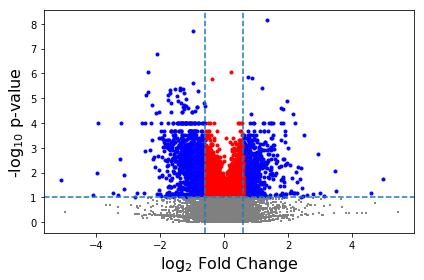

In [26]:
exp_data.label_free.volcano_plot();

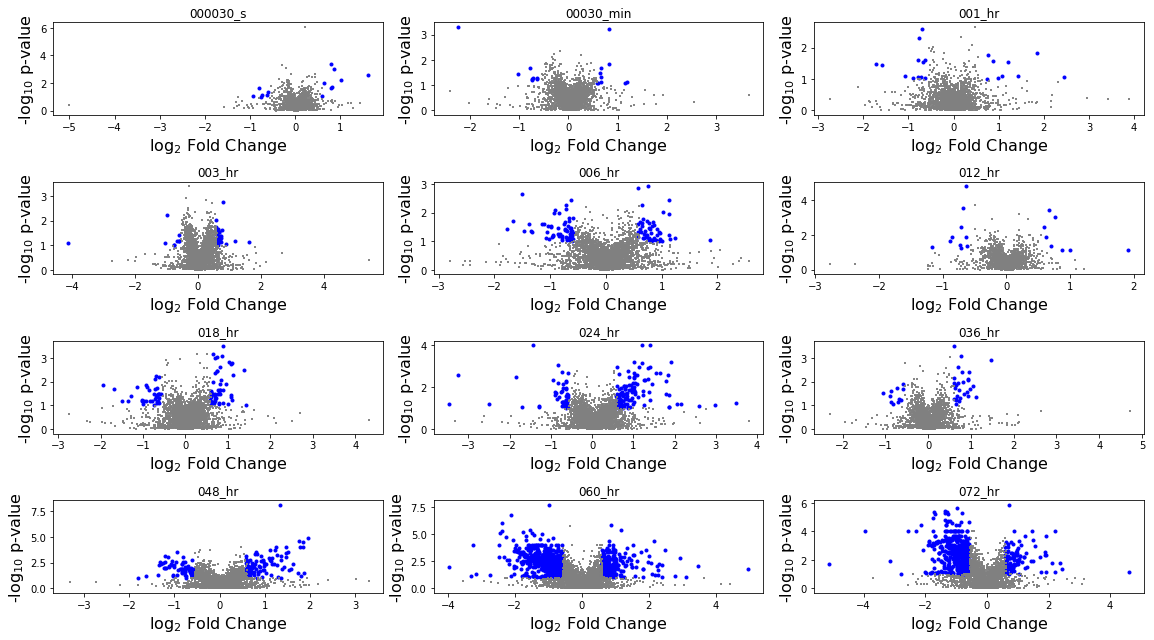

In [27]:
exp_data.label_free.volcano_by_sample(sig_column=True);

#### Histogram

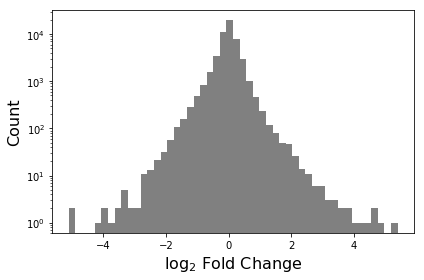

In [28]:
exp_data.label_free.plot_histogram();

#### Plotting subset of species

We provide the a few plotting interfaces to explore that subsets of the data. Basically, you create a list of species and provide it to the function. It filters based on these and then returns the results. 

##### Time series using ploty and matplotlib

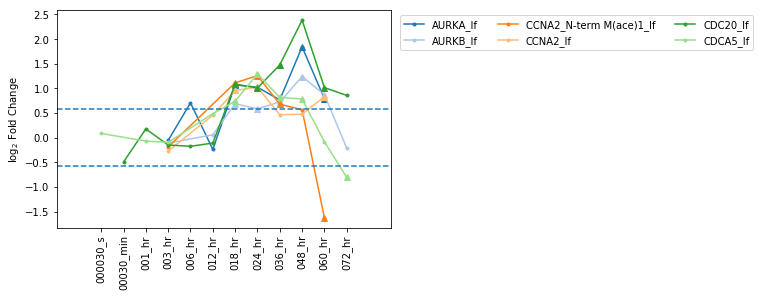

In [29]:
# sample list for demo purposes
interesting_list = ['CCNA2', 'CDCA5', 'CDC20', 'AURKA', 'AURKB']

exp_data.label_free.plot_species(interesting_list, plot_type='matplotlib');

In [30]:
exp_data.label_free.plot_species(interesting_list, plot_type='plotly')

#### Heatplots

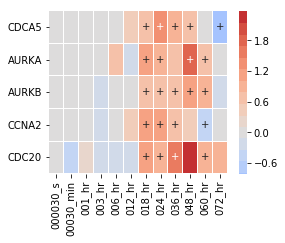

In [31]:
exp_data.label_free.heatmap(interesting_list, linewidths=0.01, figsize=(4,3));

Notice that the above plot doesn't show any of the modifiers of `CCNA2_N-term M(ace)1_lf`. This is because the default index to pivot plots is the `identifier` column. You can set the `label` column for plotting by passing index=`label` to the function. Note, if you want to filter the data using the more generic `identifier` column, you just specify that with subset_index=`identifier`

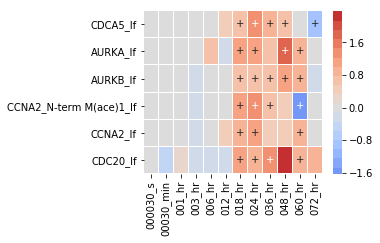

In [32]:
exp_data.label_free.heatmap(
    interesting_list, 
    index='label', 
    subset_index='identifier', 
    linewidths=0.01,
    figsize=(4,3)
);

### Examples

Here are a few examples how all the above commands can be chained together to create plots with varying degrees of critera. 

#### Query 1: 
    Heatmap of label-free proteomics that are signficantly change in at least 3 time points. 
    Extract clusters and visualize separately.

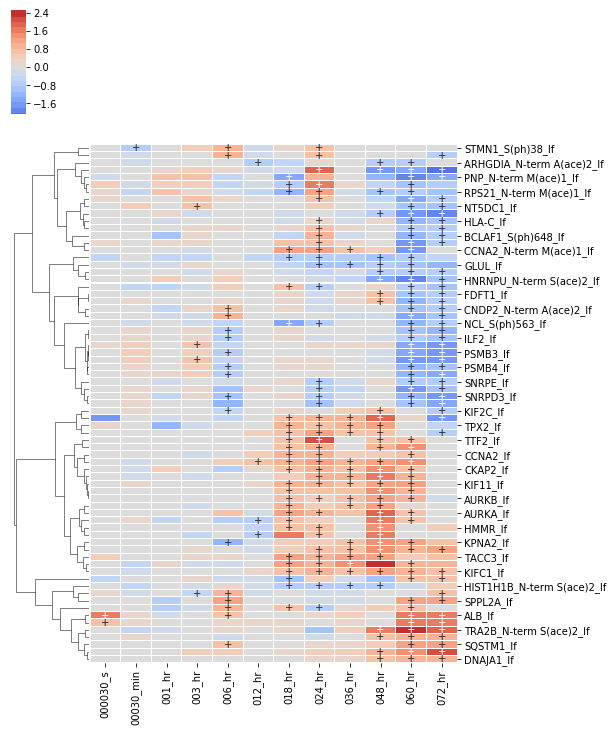

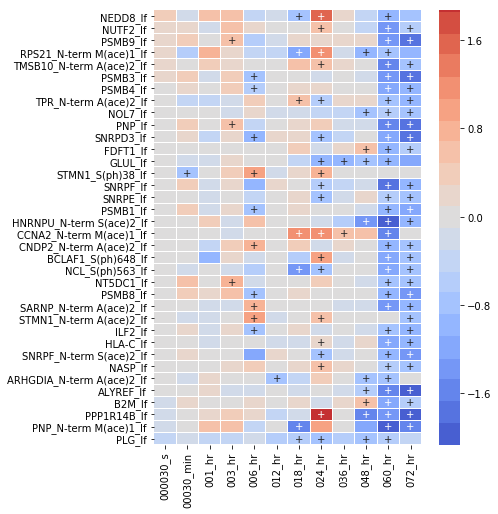

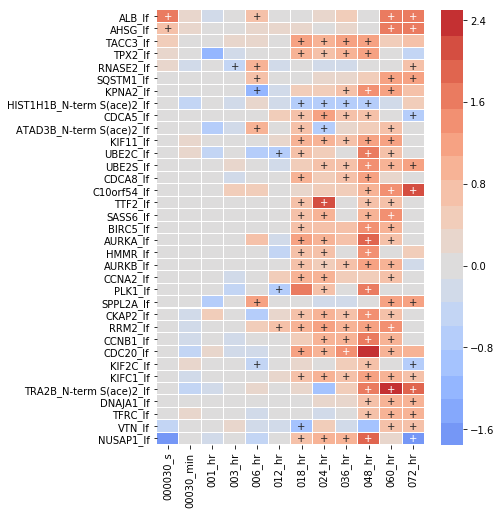

In [33]:
lf_sig = exp_data.label_free.require_n_sig(
    index='label', 
    columns='sample_id', 
    n_sig=3
)
fig = lf_sig.heatmap(
    convert_to_log=True, 
    cluster_row=True, 
    index='label',
    values='fold_change', 
    columns='sample_id', 
    annotate_sig=True, 
    figsize=(8, 12), 
    div_colors=True,
    num_colors=21, 
    linewidths=0.01
);
for i, j in fig.row_clusters.items():
    lf_sig.heatmap(j, index='label', linewidths=0.01, figsize=(6, 8))
    plt.show()

#### Query 2: 
    Changes that happen at all 2 timepoints for silac.


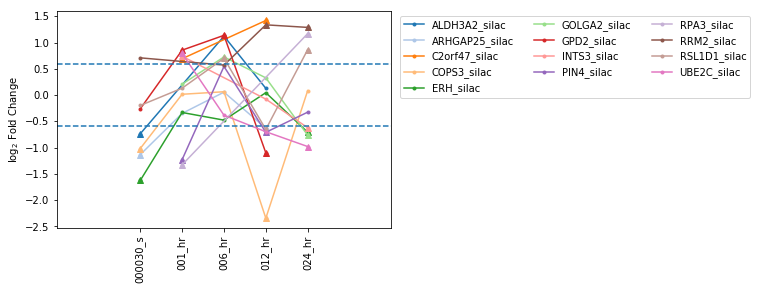

In [34]:
exp_data.silac.require_n_sig(
    n_sig=2, index='label'
).plot_species(plot_type='matplotlib');

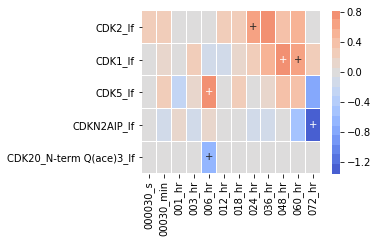

In [35]:
int_species = 'CDK'
exp_data.label_free.heatmap(
    int_species, 
    subset_index='identifier', 
    index='label', 
    min_sig=1,
    linewidths=0.01,
    figsize=(4, 3)
);

### Extending to other plots

Since our exp_data is built off a pandas.DataFrame, we can use other packages that take that data format. Seaborn is one such tool that provides some very nice plots.

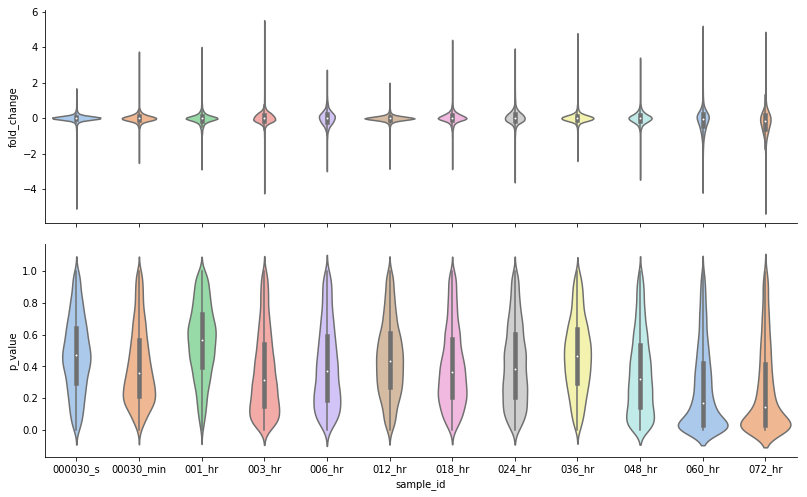

In [36]:
label_free = exp_data.label_free.copy()
label_free.log2_normalize_df(column='fold_change', inplace=True)

g = sns.PairGrid(label_free,
                 x_vars=('sample_id'),
                 y_vars=('fold_change', 'p_value'),
                 hue='source',
                 aspect=3.25, height=3.5)
g.map(
    sns.violinplot, 
    palette="pastel", 
    split=True,
    order=label_free.sample_ids
);

#### Visualizing signficant fraction of measured species

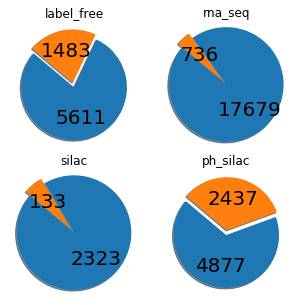

In [37]:
fig = plt.figure(figsize=(5,5))
exp_data.label_free.plot_pie_sig_ratio('pie_label_free', fig.add_subplot(221))
plt.title("label_free");
exp_data.rna.plot_pie_sig_ratio('pie_rna_seq', fig.add_subplot(222))
plt.title("rna_seq");
exp_data.silac.plot_pie_sig_ratio('pie_silac', fig.add_subplot(223))
plt.title("silac");
exp_data.ph_silac.plot_pie_sig_ratio('pie_ph_silac', fig.add_subplot(224))
plt.title("ph_silac");
plt.savefig("pie_sig_omics.png", dpi=300, bbox_inches='tight')

#### Venn diagram comparisons between measurements

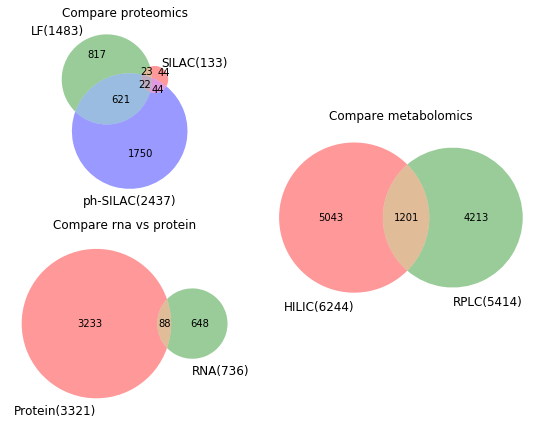

In [38]:
from magine.plotting.venn_diagram_maker import create_venn2, create_venn3

lf = exp_data.label_free.sig.id_list
silac = exp_data.silac.sig.id_list
phsilac = exp_data.ph_silac.sig.id_list
rna_names = exp_data.rna_seq.sig.id_list
hilic = exp_data.HILIC.sig.id_list
rplc = exp_data.C18.sig.id_list
fig = plt.figure(figsize=(8,6))

create_venn3(lf, silac, phsilac, 'LF', 'SILAC', 'ph-SILAC', ax=fig.add_subplot(221));
plt.title("Compare proteomics");
create_venn2(set.union(*[lf, silac, phsilac]), rna_names, 
             'Protein', 'RNA', ax=fig.add_subplot(223));
plt.title("Compare rna vs protein");
create_venn2(hilic, rplc, 'HILIC', 'RPLC', ax=fig.add_subplot(122));
plt.title("Compare metabolomics");
plt.tight_layout()
plt.savefig("venn_diagrams.png", dpi=300, bbox_inches='tight')

#### Query 3: 
    Extract out species that are significantly changed in all three omics (label-free, silac, ph-silac)

In [39]:
all_three_omics = lf.intersection(silac).intersection(phsilac)

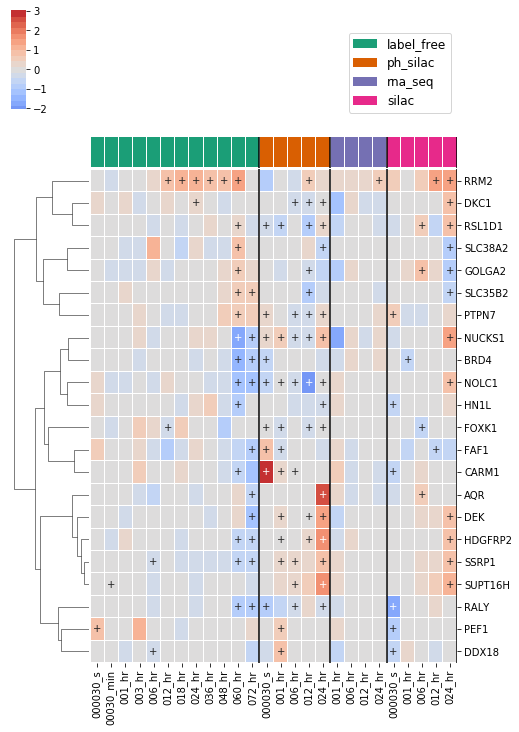

In [40]:
exp_data.species.subset(all_three_omics).heatmap(
    all_three_omics,  
    subset_index='identifier',
    columns=['source', 'sample_id',],
    min_sig=0, 
    figsize=(8, 12), cluster_row=True,
    y_tick_labels=True, linewidths=0.01
);

### Plot lists of interest

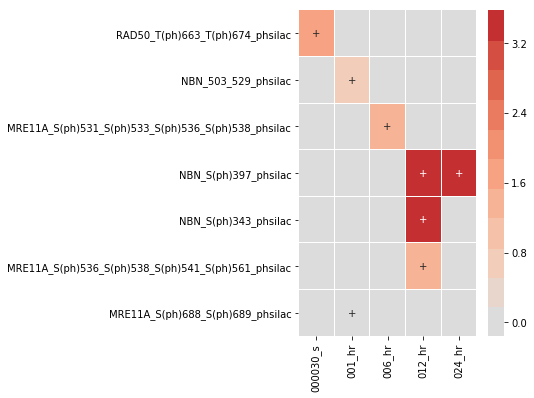

In [41]:
# sample list for demo purposes
mrn_complex = ['NBN', 'RAD50', 'MRE11A']

exp_data.species.heatmap(
    mrn_complex, 
    index='label', 
    subset_index='identifier', 
    min_sig=1, 
    linewidths=0.01,
    figsize=(4,6)
);

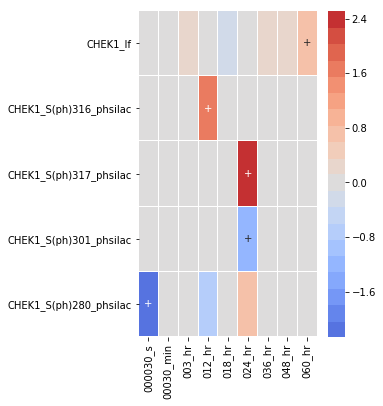

In [42]:
# sample list for demo purposes
interesting_list = ['CHEK1', 'CHEK2']

exp_data.species.heatmap(
    interesting_list, 
    index='label', 
    subset_index='identifier', 
    min_sig=1, 
    linewidths=0.01,
    figsize=(4,6)
);

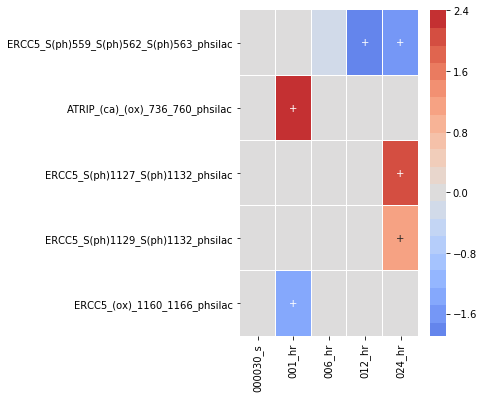

In [43]:
# sample list for demo purposes
interesting_list = ['ATRIP', 'ERCC5']

exp_data.species.heatmap(
    interesting_list, 
    index='label', 
    subset_index='identifier', 
    min_sig=1, 
    linewidths=0.01,
    figsize=(4,6)
);